In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/nisar/Downloads/au_train.csv')
df_test = pd.read_csv('C:/Users/nisar/Downloads/au_test.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Changing column name class to Salary because Class is a keyword and it might lead to errors in future.

df = df.rename(columns={'class': 'Salary'})
df_test = df_test.rename(columns={'class': 'Salary'})

In [5]:
#------Identifying Data Types------
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#------------Columns containig "?" values-------

print(df['workclass'].str.contains("\?").sum())
print(df['occupation'].str.contains("\?").sum())
print(df['native-country'].str.contains("\?").sum())

print(df_test['workclass'].str.contains("\?").sum())
print(df_test['occupation'].str.contains("\?").sum())
print(df_test['native-country'].str.contains("\?").sum())



1836
1843
583
963
966
274


In [7]:
#-------Identifying Missing Values(if any)-----
df['workclass'] = df['workclass'].str.strip()
df['workclass'].replace("?",np.nan, inplace= True)

df['occupation'] = df['occupation'].str.strip()
df['occupation'].replace("?",np.nan, inplace= True)

df['native-country'] = df['native-country'].str.strip()
df['native-country'].replace("?",np.nan, inplace= True)


df_test['workclass'] = df_test['workclass'].str.strip()
df_test['workclass'].replace("?",np.nan, inplace= True)

df_test['occupation'] = df_test['occupation'].str.strip()
df_test['occupation'].replace("?",np.nan, inplace= True)

df_test['native-country'] = df_test['native-country'].str.strip()
df_test['native-country'].replace("?",np.nan, inplace= True)


In [8]:
#---------------Dealing with missing values----------
# Since missing values are approx 5 percent of total data, it is safe to remove them

df = df.dropna()
df_test = df_test.dropna()
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
df['Salary'].value_counts()

#-------Dependent variable to Biased!----

 <=50K    22654
 >50K      7508
Name: Salary, dtype: int64

In [17]:
#--------Dealing with categorical values---------
categorical_df = df.select_dtypes(include=['object'])
categorical_df.columns

categorical_df = categorical_df.apply(enc.fit_transform)
categorical_df.head()


categorical_df_test = df_test.select_dtypes(include=['object'])
categorical_df.columns

categorical_df_test = categorical_df_test.apply(enc.fit_transform)
categorical_df_test.head()


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
0,2,1,4,6,3,2,1,37,0
1,2,11,2,4,0,4,1,37,0
2,1,7,2,10,0,4,1,37,1
3,2,15,2,6,0,2,1,37,1
5,2,0,4,7,1,4,1,37,0


In [18]:
df = df.drop(categorical_df.columns, axis=1)
df = pd.concat([df, categorical_df], axis=1)
df.head()

df_test = df_test.drop(categorical_df_test.columns, axis=1)
df_test = pd.concat([df_test, categorical_df_test], axis=1)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
0,39,77516,13,2174,0,40,5,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,4,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,2,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,2,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,2,9,2,9,5,2,0,4,0


In [24]:
df.drop('education', axis = 1, inplace = True)
df_test.drop('education', axis = 1, inplace = True)

#df_test.columns

In [25]:
X_train = df.drop('Salary', axis=1)
y_train = df['Salary']

X_test = df_test.drop('Salary', axis = 1)
y_test = df_test['Salary']

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini', random_state=21, max_depth=10)

dtree.fit(X_train, y_train)
tree_pred = dtree.predict(X_test)

print("Decision Tree accuracy: ", accuracy_score(y_test, tree_pred))

Decision Tree accuracy:  0.847211155378486


In [34]:
'''
First we will do a Randomized Search to narrow down the possibilites and 
then perform a Grid Search to further optimize the model.
'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

n_estimators = np.arange(100, 1000, 100)
max_features = np.arange(1, 10, 1)
min_samples_leaf = np.arange(2, 10, 1)
kfold = KFold(n_splits = 3)
start_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    }

rf = RandomForestClassifier()

test_rf = RandomizedSearchCV(estimator=rf, param_distributions=start_grid, cv=kfold)
print(start_grid)

{'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}


In [35]:
#----------Grid Search------------

kfold_gs = KFold(n_splits=3)
n_estimators = np.arange(100, 500, 50)
max_features = np.arange(1, 5, 1)
min_samples_leaf = np.arange(2, 5, 1)

gs_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf
}

test_grid = GridSearchCV(estimator = rf, param_grid=gs_grid, cv=kfold_gs)
res = test_grid.fit(X_train, y_train)
print(res.best_params_)
print(res.best_score_)



{'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 100}
0.8612160997281348


In [36]:
#------Implementing Final Model---------

final_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=4, max_features=3, random_state=24)
final_model.fit(X_train, y_train)


RandomForestClassifier(max_features=3, min_samples_leaf=4, random_state=24)

In [37]:
#--------Accuracy Score------------
predictions = final_model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8604249667994688


[[10704   656]
 [ 1446  2254]]


<AxesSubplot:>

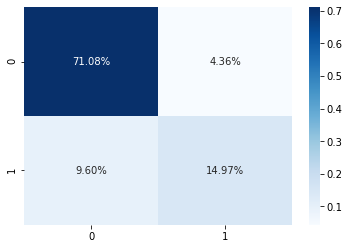

In [62]:
#-----Confusion Matrix-------------

cm = confusion_matrix(y_test, predictions)
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')


In [63]:
#----------Roc Curve and AUC------------

from sklearn.metrics import roc_curve, auc
min_samples_leafs = np.arange(2, 10, 1)


train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    fasle_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


'\nfor min_samples_leaf in min_samples_leafs:\n   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)\n   rf.fit(X_train, y_train)\n\n   train_pred = rf.predict(X_train)\n\n   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)\n   roc_auc = auc(false_positive_rate, true_positive_rate)\n   train_results.append(roc_auc)\n\n   y_pred = rf.predict(X_test)\n\n   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)\n   roc_auc = auc(false_positive_rate, true_positive_rate)\n   test_results.append(roc_auc)\n'

Text(0.5, 0, 'min samples leaf')

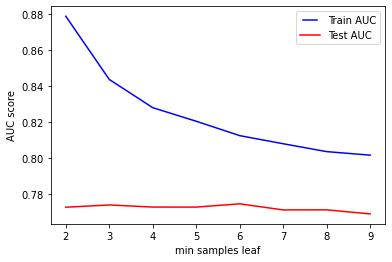

In [64]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')